In [ ]:
# !pip3 install pythainlp
# !pip3 install https://github.com/PyThaiNLP/thai_sentiment_analysis/archive/master.zip
# !pip3 install kenlm
# !pip3 install pypdf
# !pip3 install pytesseract
# !pip3 install PyMuPDF
# !pip3 install transformers

In [5]:
from pythainlp.corpus.common import thai_stopwords
from wordcloud import WordCloud, STOPWORDS
from pythainlp import word_tokenize
from pythaisa import *
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import requests


In [6]:
df = pd.read_csv(r'datasets\review_shopping.csv', sep='\t', names=['text', 'sentiment'], header=None)

In [7]:
thai_stopwords = list(thai_stopwords())

def text_process(text):
    final = "".join(u for u in text if u not in ("?", ".", ";", ":", "!", '"', "ๆ", "ฯ"))
    final = word_tokenize(final)
    final = " ".join(word for word in final)
    final = " ".join(word for word in final.split() 
                     if word.lower not in thai_stopwords)
    return final

df['text_tokens'] = df['text'].apply(text_process)

X = df[['text_tokens']]
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

cvec = CountVectorizer(analyzer=lambda x:x.split(' '))
cvec.fit_transform(X_train['text_tokens'])
print(cvec.vocabulary_)

train_bow = cvec.transform(X_train['text_tokens'])
pd.DataFrame(train_bow.toarray(), columns=cvec.get_feature_names_out(), index=X_train['text_tokens'])

lr = LogisticRegression()
lr.fit(train_bow, y_train)

test_bow = cvec.transform(X_test['text_tokens'])
test_predictions = lr.predict(test_bow)
print(classification_report(test_predictions, y_test))

{'แย่มาก': 337, 'บิด': 146, 'น้ำ': 139, 'ไม่': 367, 'แห้ง': 341, 'เสียดาย': 304, 'ตัง': 99, 'มาก': 171, 'อย่า': 257, 'ทำ': 117, 'แบบนี้': 329, 'กับ': 9, 'ใคร': 349, 'อีก': 265, 'นะ': 130, 'ค่ะ': 59, 'รับ': 193, 'ของ': 24, 'ไว': 370, 'พนักงาน': 157, 'ส่ง': 240, 'ดีมาก': 87, 'คุณภาพ': 54, 'คุ้ม': 55, 'ราคา': 197, 'ซื้อ': 83, 'แล้ว': 340, 'ผิดหวัง': 153, 'สินค้า': 234, 'มี': 173, 'สิน': 233, 'ค้าส่ง': 61, 'มา': 170, 'แตกหัก': 322, 'ยัง': 179, 'ได้': 362, 'ประกอบ': 150, 'เลย': 299, 'เสียความรู้สึก': 302, 'วัสดุ': 215, 'เหมือน': 312, 'หมดอายุ': 247, 'ของปลอม': 26, 'เนื่อ': 286, 'ครีม': 40, 'ซอง': 80, '10': 0, 'บาท': 145, 'บรรจุภัณฑ์': 140, 'ก๊อ': 22, 'ป': 148, 'ของจริง': 25, 'ใน': 357, 'ห้าง': 254, 'ตังค์': 100, 'ทิ้ง': 122, 'สวย': 223, 'ใช้งาน': 353, 'ง่าย': 63, 'ที่': 123, 'สำคัญ': 232, 'เร็ว': 298, 'คะ': 45, 'แพ๊': 335, 'คดี': 36, 'สภาพ': 219, 'ดี': 85, 'ถูก': 112, 'ไม่ต้อง': 369, 'ไป': 366, 'เดิน': 278, 'ช๊อป': 79, 'เอง': 315, 'หมด': 246, 'ทำไม': 121, 'แจ้ง': 320, 'ขึ้น': 31, 'ว่า': 216

In [8]:
my_df = pd.read_csv(r"datasets\sample.csv")

In [9]:
my_lst = my_df.iloc[:, 0].tolist()

def sentiment(lst):
    text = []
    prediction = []
    for item in lst:
        my_tokens = text_process(item)
        my_bow = cvec.transform(pd.Series([my_tokens]))
        my_predictions = lr.predict(my_bow)
        text.append(item)
        prediction.append(my_predictions[0])
    return list(zip(text, prediction))

sentiment_lst = sentiment(my_lst)
print(sentiment_lst)

[('อ้าว อยากมีเรื่องหรอวะ ไอ้หัวเกรียน!', 'neg'), ('ขอโทษที่รบกวนคะ', 'pos'), ('รักเธอนะ คนดี', 'neg'), ('เหี้ย สัตว์มึงอย่าเสือกดิ', 'neg'), ('ไอ้คนทรยศ แกอย่าหวังว่าจะตายดี', 'neg'), ('ดีใจด้วยนะ คุณหญิงกฤตยา', 'neg'), ('เธอเป็นความภูมิใจที่สุดของฉัน', 'pos'), ('ทปอ. ว่าแต่เขาอิเหนาเป็นเอง ขี้คุยชมัด', 'neg'), ('ติดมหิดล รอบพอร์ตแล้ว เย้ๆๆ', 'neg'), ('มือถือค้างอ่ะ เซ็งจัง', 'neg'), ('เอาหมูคุโรบุตะมาทำสเต๊กนี่ กินแล้วฟินขั้นเทพพพพ', 'neg'), ('เกรซไม่เคยเปิดใจให้เรา ไม่รู้เค้ามีอคติไรนักหนา', 'neg'), ('สอบเกือบผ่าน ตกไปแค่ 0.5 คะแนนเอง ถถถถ', 'neg'), ('ทักคับ 😃', 'neg'), ('ยินดีด้วยแนนได้ผู้แทนเลขละ มาสอนข้าน้อยด้วยด่วนๆ5555', 'neg'), ('น่าเสียดายอ่ะน้องแกพลาดประธานตึกไปแค่ 16 แต้ม 😭', 'neg'), ('น่ารักมากมายด์ ตายอย่างสงบศพสีชมพู❤️', 'neg'), ('หลายครั้ง ความรักก็ทำให้เราตาบอดนะ เอิร์น', 'neg'), ('เหม็น หยุดใช้น้ำหอมยี่ห้อนี้ได้มะ เรารู้สึกเหม็นฉุนๆ มากกว่าหอมอ่า._.', 'pos'), ('พระคุณที่สามงดงามแจ่มใส', 'neg'), ('ของเก่าจนเกือบจะใช้ไม่ได้ เหมือนอายุเจ้าของที่ใกล้ลงโลง', 'neg'), ('สบาย

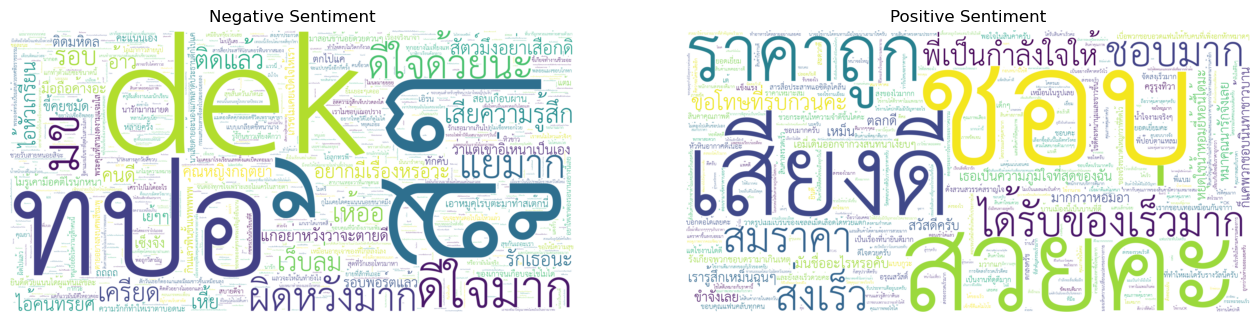

In [10]:
text_neg = " ".join(text for text, sentiment in sentiment_lst if sentiment == 'neg')
text_pos = " ".join(text for text, sentiment in sentiment_lst if sentiment == 'pos')

fp = 'THSarabunNew.ttf'
reg = r"[ก-๙a-zA-Z']+"

wordcloud_neg = WordCloud(stopwords=thai_stopwords, background_color='white', max_words=2000,
                          height=2000, width=4000, font_path=fp, regexp=reg).generate(text_neg)

wordcloud_pos = WordCloud(stopwords=thai_stopwords, background_color='white', max_words=2000,
                          height=2000, width=4000, font_path=fp, regexp=reg).generate(text_pos)

fig, axs = plt.subplots(1, 2, figsize=(16, 8))

axs[0].imshow(wordcloud_neg, interpolation='bilinear')
axs[0].axis('off')
axs[0].set_title('Negative Sentiment')

axs[1].imshow(wordcloud_pos, interpolation='bilinear')
axs[1].axis('off')
axs[1].set_title('Positive Sentiment')

plt.show()